<a href="https://colab.research.google.com/github/fausiahms/Machine-Learning/blob/main/Machine_Learning_MID_(H081211021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install statsmodels pandas

# Import library
import pandas as pd
import statsmodels.api as sm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import data dari drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Data
asuransi = pd.read_csv('/content/drive/MyDrive/SwedishMotorInsurance.csv')
asuransi

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1.0,1.0,1.0,1.0,455.13,108.0,392491
1,1.0,1.0,1.0,2.0,69.17,19.0,46221
2,1.0,1.0,1.0,3.0,72.88,13.0,15694
3,1.0,1.0,1.0,4.0,1292.39,124.0,422201
4,1.0,NaN,1.0,5.0,191.01,40.0,119373
...,...,...,...,...,...,...,...
2177,5.0,7.0,7.0,5.0,8.74,0.0,0
2178,5.0,7.0,7.0,6.0,16.61,0.0,0
2179,5.0,7.0,7.0,7.0,2.83,1.0,966
2180,5.0,7.0,7.0,8.0,13.06,0.0,0


In [36]:
#DataFrame
df = pd.DataFrame(asuransi)

In [37]:
#Variabel Dependen dan Independen
X = df['Payment']
Y = df['Insured']


In [40]:
# Tambahkan konstanta untuk intersep
X = sm.add_constant(X)

In [41]:
# Inisialisasi dan latih model
model = sm.OLS(Y, X).fit()
model

In [42]:
# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model pada data
model.fit(X, Y)

# Dapatkan koefisien regresi dan intersep
koefisien = model.coef_
intersep = model.intercept_

# Cetak koefisien dan intersep
print("Koefisien Regresi:", koefisien)
print("Intersep:", intersep)

Koefisien Regresi: [0.         0.00519333]
Intersep: -242.53097913200145


In [43]:
# Buat persamaan regresi linier
equation = f'Insured = {intercept:.2f} + {coef:.2f}(Payment)'
print(equation)


Insured = -242.53 + 0.01(Payment)


In [27]:
!pip install scikit-learn pandas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi nilai
Y_pred = model.predict(X)

# Hitung metrik
mae = (abs(Y - Y_pred)).mean()
mse = ((Y - Y_pred) ** 2).mean()
r2 = r2_score(Y, Y_pred)

# Tampilkan metrik
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Mean Absolute Error (MAE): 570.43
Mean Squared Error (MSE): 4135784.55
R-squared (R²): 0.87


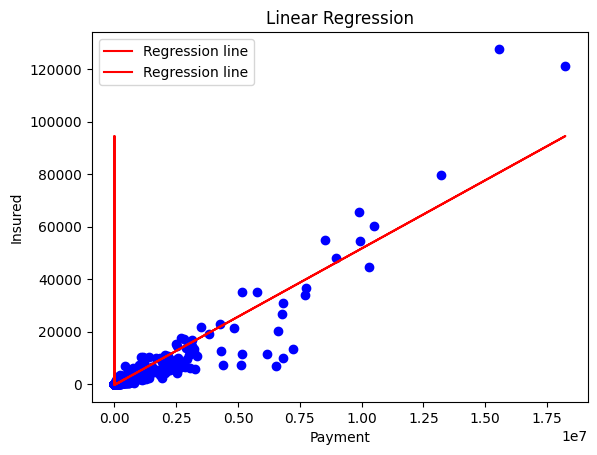

In [35]:
casuransi = asuransi[['Kilometres', 'Zone','Bonus', 'Payment','Insured','Claims']]
plt.scatter(casuransi.Payment, casuransi.Insured, color='blue')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel("Payment")
plt.ylabel("Insured")
plt.title('Linear Regression')
plt.legend()
plt.show()